In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
     

# Load the Titanic dataset
titanic_data = pd.read_csv("C:\\Users\\Nivedita\\Downloads\\Titanic-Dataset.csv")

# Handle missing values
titanic_data.fillna({'Age': titanic_data['Age'].median(), 'Embarked': 'S'}, inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Feature engineering
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

# Select features and target variable
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']]
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.81


In [6]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



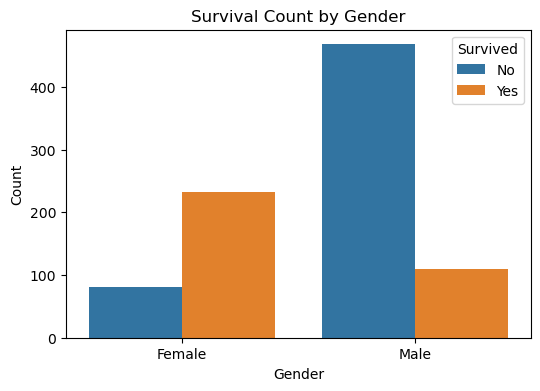

In [7]:
#Survival Rate by Gender
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_data, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


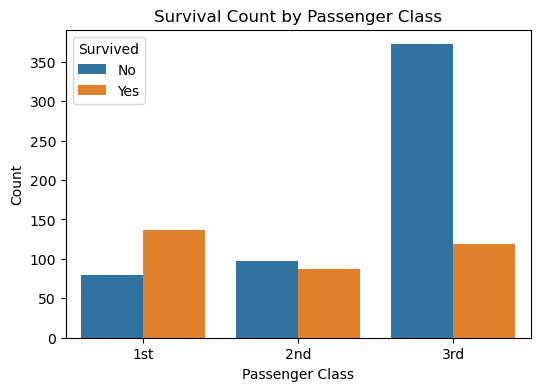

In [8]:
#Survival Rate by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_data, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['1st', '2nd', '3rd'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


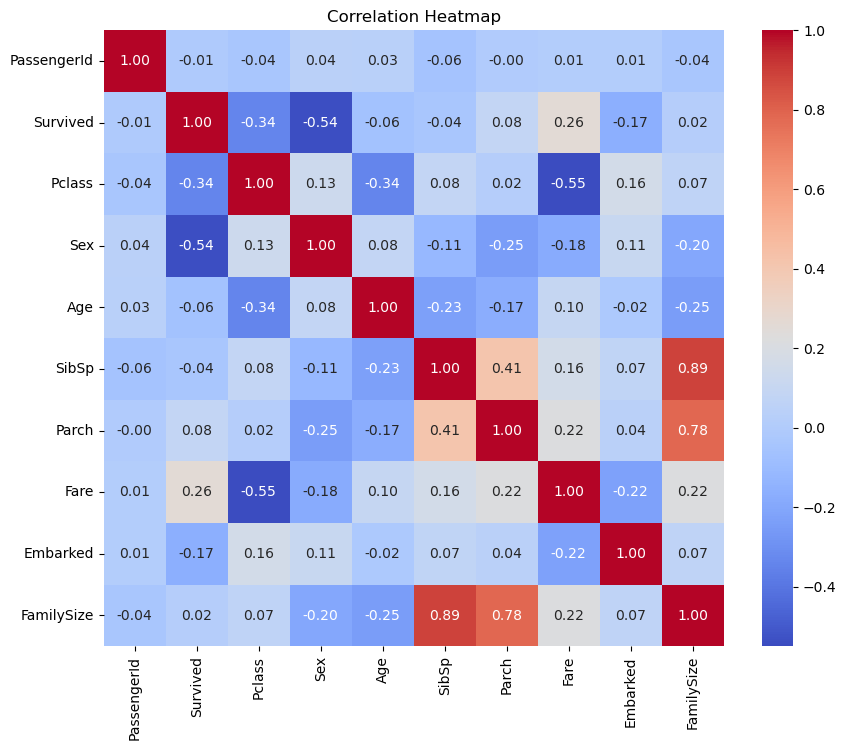

In [11]:
# Exclude non-numeric columns
numeric_columns = titanic_data.select_dtypes(include=['number']).columns
correlation_matrix = titanic_data[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


C:\Users\Nivedita\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


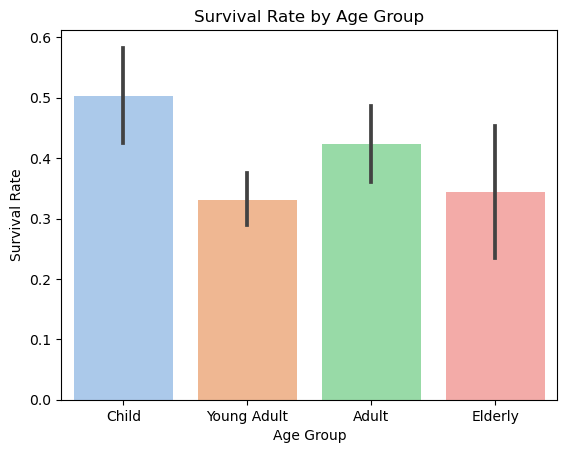

In [12]:
# Survival Rate by Age Group
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Elderly'])
sns.barplot(data=titanic_data, x='AgeGroup', y='Survived', palette='pastel')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

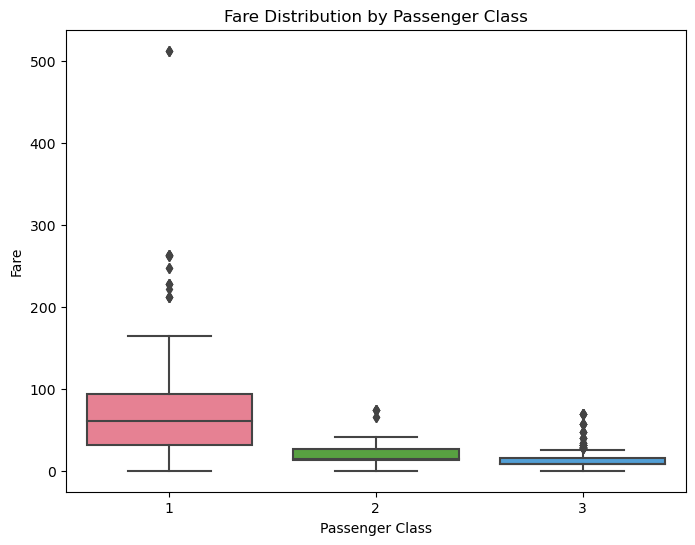

In [13]:
# Fare Distribution by Passenger Class
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic_data, x='Pclass', y='Fare', palette='husl')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

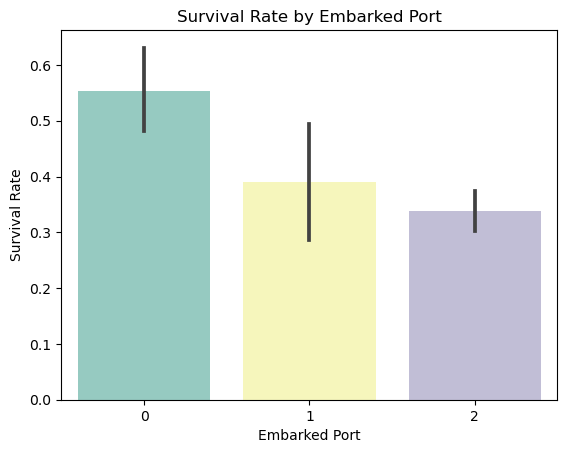

In [14]:
# Survival Rate by Embarked Port
sns.barplot(data=titanic_data, x='Embarked', y='Survived', palette='Set3')
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

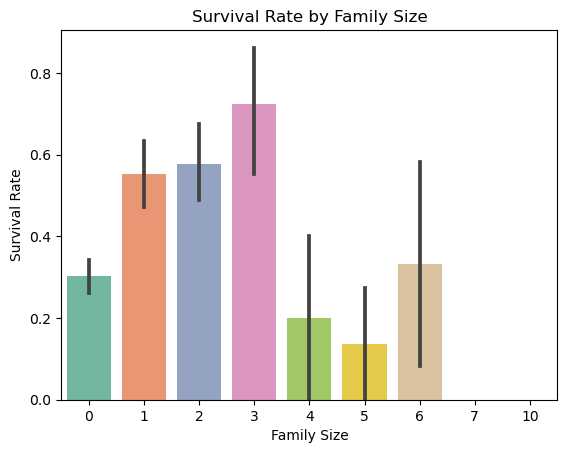

In [15]:
# Family Size and Survival
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']
sns.barplot(data=titanic_data, x='FamilySize', y='Survived', palette='Set2')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

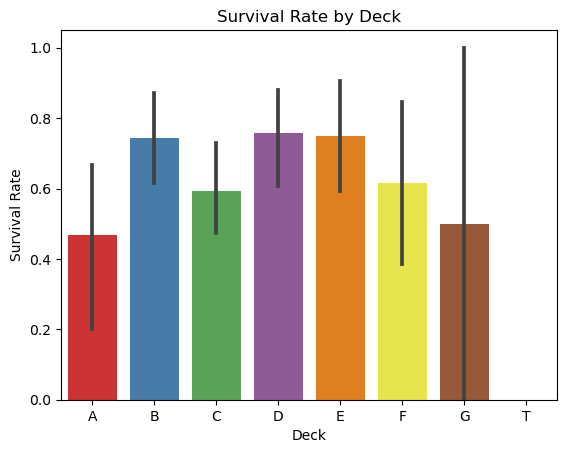

In [16]:
# Extract Deck from Cabin
titanic_data['Deck'] = titanic_data['Cabin'].str[0]
sns.barplot(data=titanic_data, x='Deck', y='Survived', order=sorted(titanic_data['Deck'].dropna().unique()), palette='Set1')
plt.title('Survival Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.show()

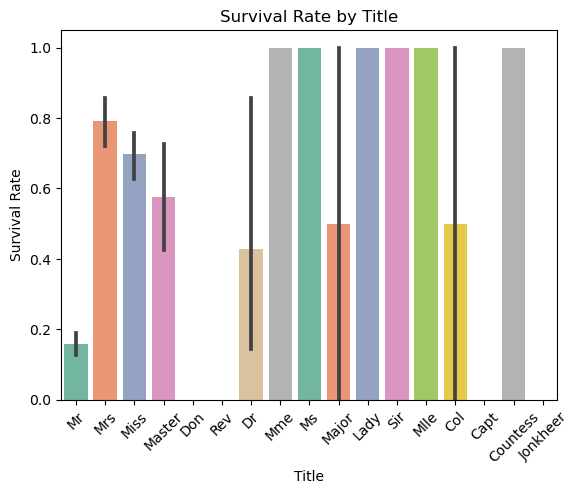

In [17]:
# Title Extraction from Names
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
sns.barplot(data=titanic_data, x='Title', y='Survived', palette='Set2')
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

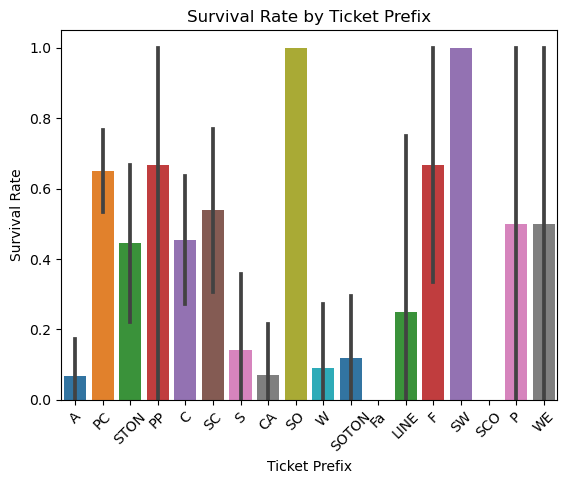

In [18]:
# Survival Rate by Ticket Prefix
titanic_data['TicketPrefix'] = titanic_data['Ticket'].str.extract('([A-Za-z]+)', expand=False)
sns.barplot(data=titanic_data, x='TicketPrefix', y='Survived', palette='tab10')
plt.title('Survival Rate by Ticket Prefix')
plt.xlabel('Ticket Prefix')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()